In [ ]:
%pip install pandas numpy ta-lib-binary scikit-learn
# %pip install "C:\Users\learner\Downloads\ta_lib-0.6.3-cp310-cp310-win_amd64.whl" --> uncomment and download the actual file from website pls
%pip install pandas
%pip install scikit-learn
%pip install xgboost
%pip install matplotlib seaborn

In [36]:
import pandas as pd
import numpy as np
import talib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import glob
from functools import reduce
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('stock_prices.csv')
df['date'] = pd.to_datetime(df['date'], utc=True)

# Filter the data for training --> September, October, November
train_data = df[(df['date'].dt.month.isin([9, 10, 11])) & (df['date'].dt.year == 2024)]

# Filter for testing --> December, January, February
test_data = df[(df['date'].dt.month.isin([12, 1, 2])) & (df['date'].dt.year == 2024)]

train_data['macd'], train_data['signal'], train_data['hist'] = talib.MACD(train_data['close_price'], 
                                                        fastperiod=12, slowperiod=26, signalperiod=9)

test_data['macd'], test_data['signal'], test_data['hist'] = talib.MACD(test_data['close_price'], 
                                                        fastperiod=12, slowperiod=26, signalperiod=9)

train_data = train_data.dropna(subset=['macd', 'signal', 'hist'])
test_data = test_data.dropna(subset=['macd', 'signal', 'hist'])

X_train = train_data[['open_price', 'high', 'low', 'close_price', 'volume', 'macd', 'signal', 'hist']]
y_train = np.where(train_data['close_price'].shift(-1) > train_data['close_price'], 1, 0)

X_test = test_data[['open_price', 'high', 'low', 'close_price', 'volume', 'macd', 'signal', 'hist']]
y_test = np.where(test_data['close_price'].shift(-1) > test_data['close_price'], 1, 0)


In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Logistic Regression Accuracy:', accuracy)

Logistic Regression Accuracy: 0.4293785310734463


In [33]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

accuracy_2 = model2.score(X_test, y_test)
print('Random Forest Accuracy:', accuracy_2)

Random Forest Accuracy: 0.5480225988700564


In [34]:
model3 = XGBClassifier(random_state=42)
model3.fit(X_train, y_train)

accuracy_3 = model3.score(X_test, y_test)
print('XGBoost Accuracy:', accuracy_3)

XGBoost Accuracy: 0.5423728813559322


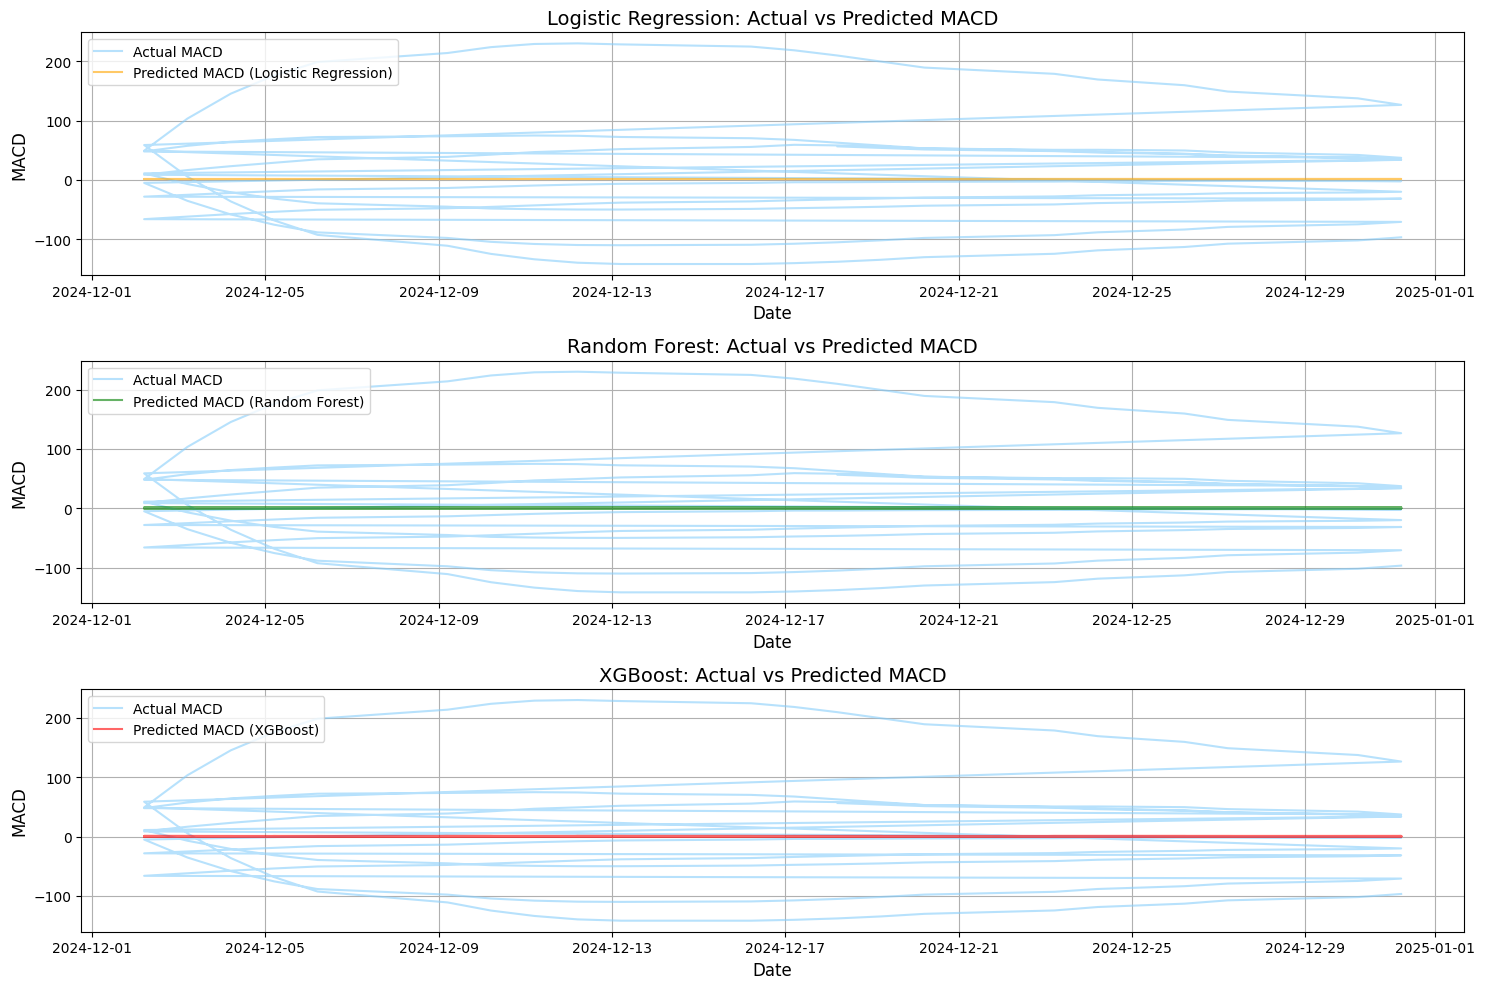

In [ ]:
y_pred_lr_macd = model.predict(X_test) 
y_pred_rf_macd = model2.predict(X_test) 
y_pred_xgb_macd = model3.predict(X_test)  

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(test_data['date'], test_data['macd'], label='Actual MACD', color='lightskyblue', alpha=0.6)
plt.plot(test_data['date'], y_pred_lr_macd, label='Predicted MACD (Logistic Regression)', color='orange', alpha=0.6)
plt.title('Logistic Regression: Actual vs Predicted MACD', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('MACD', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(test_data['date'], test_data['macd'], label='Actual MACD', color='lightskyblue', alpha=0.6)
plt.plot(test_data['date'], y_pred_rf_macd, label='Predicted MACD (Random Forest)', color='green', alpha=0.6)
plt.title('Random Forest: Actual vs Predicted MACD', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('MACD', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(test_data['date'], test_data['macd'], label='Actual MACD', color='lightskyblue', alpha=0.6)
plt.plot(test_data['date'], y_pred_xgb_macd, label='Predicted MACD (XGBoost)', color='red', alpha=0.6)
plt.title('XGBoost: Actual vs Predicted MACD', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('MACD', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()
